## Gravitationsanomalien verschiedener Störkörper

Mit diesen Jupyter-Notebook können Sie die Dichteanomalien verschiedener Dreichschichtfälle und einzelner Inklusionnen untersuchen. 

In der ersten Aufgabe untersuchen Sie die lokale Veränderung der Graviationsbeschleunigung zweier verschiedener Drei-Schicht-Fälle. 

In der zweiten Aufgabe lässt dich die lokale Veränderung der Gravitationsbeschleuingung einer einzelnen In klusion verschiedener Dichte und Form untersuchen.  

Zu jeder Aufgabe gibt es eine Reihe von Fragestellungen, die Sie bitte kurz mithilfe des Skripts beantworten. 

In [2]:
''' Berechnet Schwerefeld-Anomalien für gegebene Dichteverteilungen und stellt diese graphisch dar

    © Nepomuk Boitz, April 2020, boitz@geophysik.fu-berlin.de
'''


import numpy as np
import matplotlib.pyplot as plt

def get_anomaly_new(rho,xv,zv,p):
    [rho1,xv1,zv1] = extend_model(rho,xv,zv,p)
    G=6.67508e-11
    x_obs=np.linspace(np.min(xv),np.max(xv),np.shape(xv)[1])
    z_obs=0*np.ones(len(x_obs))
    gz = np.zeros(len(x_obs));
    gh = np.zeros(len(x_obs));
    V = 1; 
    for k in range(len(x_obs)):
        pos_x = (np.sqrt((xv1-x_obs[k])**2 + (zv1-z_obs[k])**2) <= p)# + .05*(zv-z_obs[k])**2)
        r=np.sqrt((x_obs[k]-xv1*(pos_x))**2 + (z_obs[k]-zv1*(pos_x))**2)+10**(-7) # distance to observation point#
        rz=(z_obs[k]-zv1*(pos_x))/r # z-component of unit vector to observation point
        gz[k]=-G*V*np.sum(rz*(rho1*pos_x)/r**2) # sum over all masses
    return gz

def extend_model(mod,xv,zv,r):
    x_min = np.min(xv) - r
    x_max = np.max(xv) + r
    x=np.linspace(x_min,x_max,nx+2*r)
    z=np.linspace(np.min(zv),np.max(zv),np.shape(xv)[0])
    xv1,zv1=np.meshgrid(x,z,indexing='xy')
    mod1 =np.zeros(np.shape(xv1)) 
    mod1[:,r:r+np.shape(xv)[1]] = mod
    for i in range(r):
        mod1[:,i] = mod[:,0]
    for i in range(r+np.shape(xv)[1],np.shape(xv1)[1]):
        mod1[:,i] = mod[:,np.shape(xv)[1]-1]
    #mod1[:,np.shape(xv)[0]:-1] = mod[:,0]
    return [mod1,xv1,zv1]

def circular_inclusion(rho,x,z,x_size,z_size,rho_val): 
    for i in range(np.shape(rho)[1]):
        for j in range(np.shape(rho)[0]):
            if np.sqrt(((x-i)/x_size)**2 + ((z-j)/z_size)**2) < 1:
                rho[j,i] = rho_val
    return rho
def retangular_inclusion(rho,x,z,x_size,z_size,rho_val): 
    rho[z-round(z_size):z+round(z_size),x-round(x_size):x+round(x_size)] = rho_val
    return rho
            
x_min = -100; 
x_max = 100; 
z_min = 0; 
z_max = 100; 
h=1.
V=h**3

nx=np.int((x_max-x_min)/h)+1
nz=np.int((z_max-z_min)/h)+1

x=np.linspace(x_min,x_max,nx)
z=np.linspace(z_min,z_max,nz)

xv,zv=np.meshgrid(x,z,indexing='xy')



# Unterschiedliche Dichteverteilungen

Im unteren Beispiel sind Ihnen zwei unterschiedliche Modelle mit verschiedenen Dichteverteilungen und die dazugehörige Gravitationsanomalie gegeben. 

   1. Wie und warum verändert sich die Gravitationsbeschleunigung bei zunehmender (bzw. abnehmender) Dichte? Wann ist die Veränderung der Gravitationsbeschleunigung positiv, wann negativ ? 
   2. Erklären Sie, warum sich die Kurven in Modell 1 und Modell 2 sehr ähnlich sehen. Lässt sich von einer an der Oberfläche gemessenen Dichteanomalie eindeutig auf die Dichteverteilung im Untergrund schließen ? 


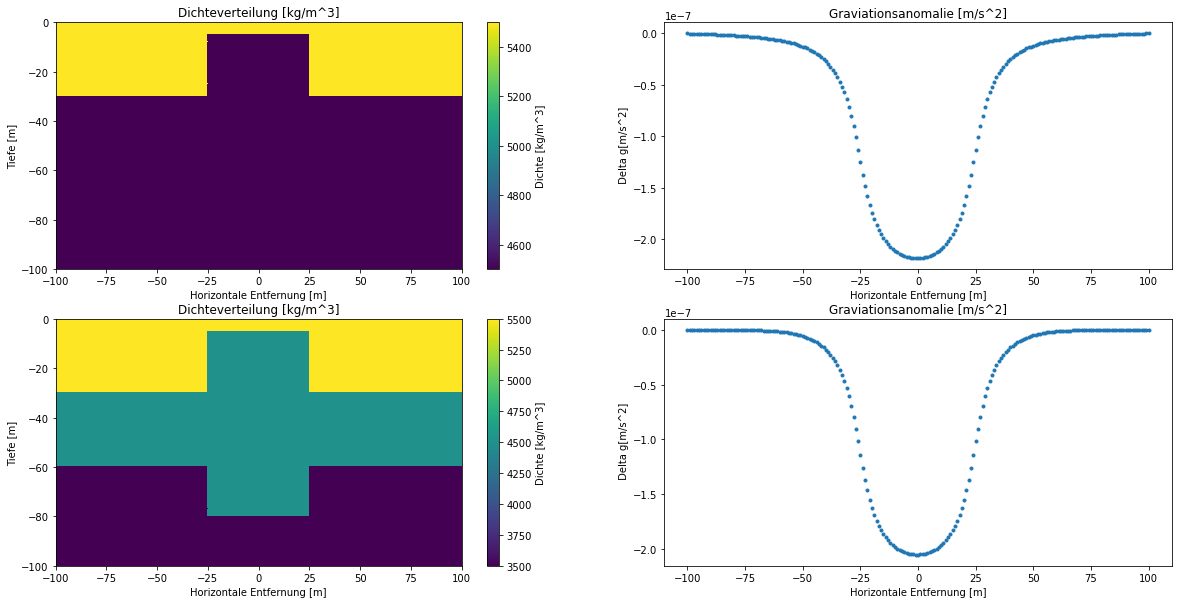

In [9]:

# Define some density distribution.

## Modell 1: Dichte 

rho1_m1 = 5500; 
rho2_m1 = 4500; 

## Modell 2: Dichte  

rho1 = 5500; 
rho2 = 4500; 
rho3 = 3500; 

# Ab hier alles so lassen 

mod1=np.zeros(np.shape(xv)) # To initialize, set all densities to zero.
mod1[0:-1,:]=rho1_m1 # Set density below the surface of the Earth.
mod1[30:100,:]=rho2_m1 # Set density below the surface of the Earth.
mod1[5:80,75:125]=rho2_m1 # Set density below the surface of the Earth.

mod2=np.zeros(np.shape(xv)) # To initialize, set all densities to zero.
mod2[0:-1,:]=rho1 # Set density below the surface of the Earth.
mod2[30:100,:]=rho2 # Set density below the surface of the Earth.
mod2[60:100,:]=rho3 # Set density below the surface of the Earth.
mod2[5:80,75:125]=rho2 # Set density below the surface of the Earth.

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.pcolor(xv,-zv,mod1)
cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)
plt.title('Dichteverteilung [kg/m^3]')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')
plt.subplot(2,2,2)
gz = get_anomaly_new(mod1,xv,zv,100)
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz-gz[0],'.')
plt.title('Graviationsanomalie [m/s^2]')
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel(' Delta g[m/s^2]')

plt.subplot(2,2,3)
plt.pcolor(xv,-zv,mod2)
cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)
plt.title('Dichteverteilung [kg/m^3]')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')
plt.subplot(2,2,4)
gz1 = get_anomaly_new(mod2,xv,zv,100)
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz1-gz1[0],'.')
plt.title('Graviationsanomalie [m/s^2]')
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel(' Delta g[m/s^2]')
plt.show()



## Größe und Lage eines Störkörpers 

In der unten stehenden Zelle können sie die Lage, Größe und Tiefe eines Störkörpers und die davon hervorgerufene Dichteanomalie untersuchen: 

Dazu vergleichen wir immer ein 'Baseline-Modell' (Standardmodell) mit einem neuen Modell und schauen uns die Unterschiede an. 
Variieren sie die Modellparameter und schauen Sie sich das Ergebnis an. Beantworten sie dann die folgenden Fragen: 

   3. Was passiert wenn die gleiche Anomalie tiefer liegt ? 
   4. Was passiert wenn die Dichteanomalie räumlich weniger ausgedehnt ist ?
   5. Was passiert wenn der Dichtekontrast deutlich stärker (bzw. deutlich schächer) ist ?
   6. Können Sie aus der Dichteanomalie eindeutig auf die Tiefe, bzw. exakte Dichte schließen oder ist das Ergebnis mehrdeutig ? 

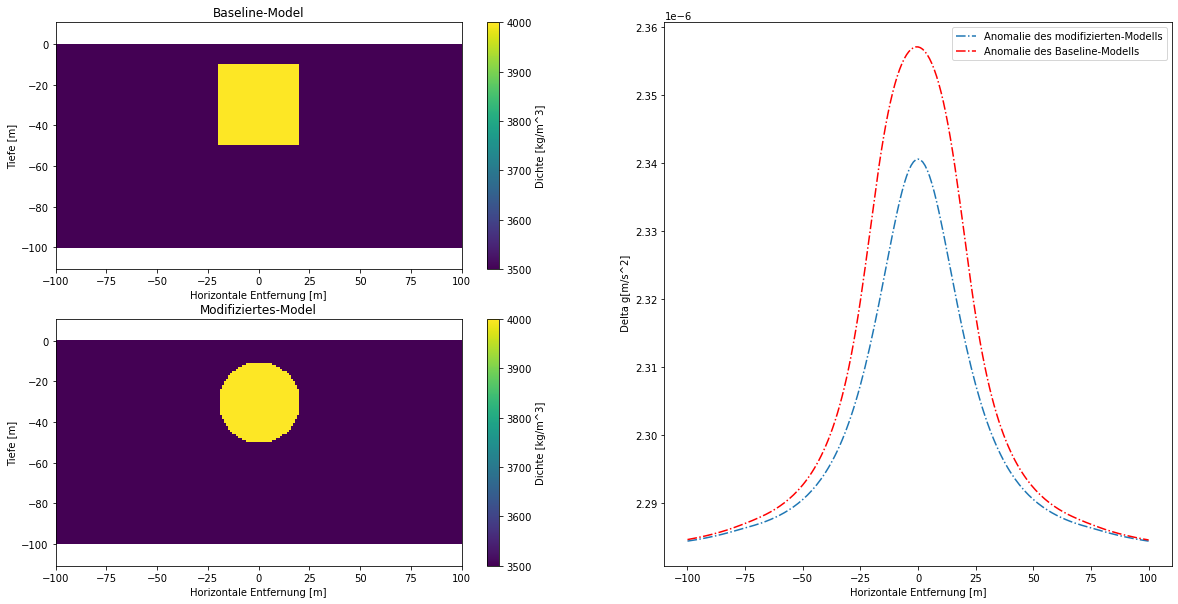

In [3]:
# Größe und Lage eines Störkörpers 

## Model parameter zum Verändern

z = 30; # Tiefe des Störkörpers [m]
x = 100; # Horizontale Position des Störkörpers [m]
x_size = 20; # Horizontale Ausdehnung [m]
z_size = 20; # Vertikale Ausdehnung [m]
rho2 = 4000; # Dichte des Störkörpers [m]
in_type = 0; # 0: Störkörper ist ein Rechteck, 1: Störkörper ist eine Ellipse
##


## Ab hier alles so lassen 
# Baseline-Modell
model2 = 3500*np.ones(np.shape(xv))
model_base = np.copy(model2); 
model_base[30-20:30+20,100-20:100+20] = 4000 
if in_type == 0:
    model2 = circular_inclusion(model2,x,z,x_size,z_size,rho2)
elif in_type == 1:
    model2 = retangular_inclusion(model2,x,z,x_size,z_size,rho2)
#model2[z-z_size:z+z_size,x-x_size:x+x_size] = rho2


# Anomalie berechnen
gz = get_anomaly_new(model2,xv,zv,100)
gz_base = get_anomaly_new(model_base,xv,zv,100)
# Ergebnisse plotten
plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
plt.pcolor(xv,-zv,model2)
cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)

plt.axis('equal')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')
plt.title('Modifiziertes-Model')
plt.subplot(2,2,1)
plt.pcolor(xv,-zv,model_base)

cbar = plt.colorbar()
cbar.set_label('Dichte [kg/m^3]', rotation=90)

plt.axis('equal')
plt.title('Baseline-Model')
plt.ylabel('Tiefe [m]')
plt.xlabel('Horizontale Entfernung [m]')

plt.subplot(1,2,2)
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz,'-.')
plt.plot(np.linspace(np.min(xv),np.max(xv),len(gz)),gz_base,'r-.',)
plt.legend(['Anomalie des modifizierten-Modells','Anomalie des Baseline-Modells'])
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel(' Delta g[m/s^2]')
plt.show()
